## Preprocessing

In [1]:
import cv2
import os
from matplotlib import pyplot as plt

In [2]:
normal = '../data/preprocessing/filtered-data/RFMiD/Normal/16.png'
amd = '../data/preprocessing/filtered-data/ODIR/Pure AMD/1085_left.jpg'

In [3]:
def resize(normal, amd):
    n_image = cv2.imread(normal)
    a_image = cv2.imread(amd)
    resized_n_img = cv2.resize(n_image, (512, 512))
    resized_a_img = cv2.resize(a_image, (512, 512))
    recolored_n_img = cv2.cvtColor(resized_n_img, cv2.COLOR_BGR2RGB)
    recolored_a_img = cv2.cvtColor(resized_a_img, cv2.COLOR_BGR2RGB)

    images = [recolored_n_img, recolored_a_img]
    
    num_rows, num_cols = 1, 2
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
    axes = axes.flatten()

    for i, (image, ax) in enumerate(zip(images, axes)):
        ax.imshow(image)
        ax.set_title('{}'.format('Normal' if i == 0 else 'AMD'))
    plt.show()

    return recolored_n_img, recolored_a_img

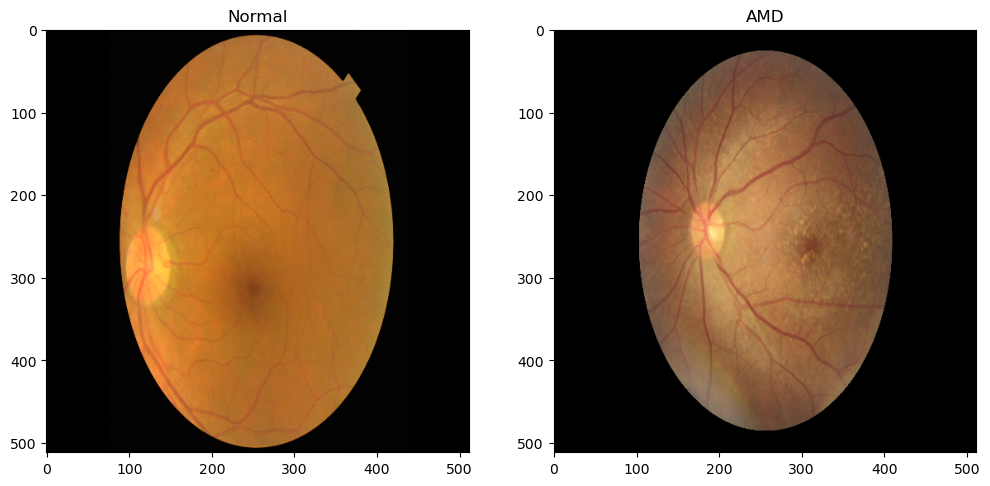

In [4]:
normal, amd = resize(normal, amd)

In [5]:
def rgb_split_normal(normal, amd):
    b_normal, g_normal, r_normal = cv2.split(normal)
    b_amd, g_amd, r_amd = cv2.split(amd)

    images = [g_normal, g_amd]
    rgb_normal = [b_normal, g_normal, r_normal]
    rgb_amd = [b_amd, g_amd, r_amd]
    normal_labels = ['Red Normal', 'Green Normal', 'Blue Normal']
    amd_labels = ['Red AMD', 'Green AMD', 'Blue AMD']
    
    num_rows, num_cols = 1, 3
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
    axes = axes.flatten()
    cmaps = [plt.cm.Reds_r, plt.cm.Greens_r, plt.cm.Blues_r]

    for i, (image, ax, cmap, label) in enumerate(zip(rgb_normal, axes, cmaps, normal_labels)):
        ax.imshow(image, cmap=cmap)
        ax.set_title('{}'.format(label))
    plt.show()

    return rgb_normal, rgb_amd

In [6]:
def rgb_split_amd(normal, amd):
    b_normal, g_normal, r_normal = cv2.split(normal)
    b_amd, g_amd, r_amd = cv2.split(amd)

    images = [g_normal, g_amd]
    rgb_normal = [b_normal, g_normal, r_normal]
    rgb_amd = [b_amd, g_amd, r_amd]
    normal_labels = ['Red Normal', 'Green Normal', 'Blue Normal']
    amd_labels = ['Red AMD', 'Green AMD', 'Blue AMD']
    
    num_rows, num_cols = 1, 3
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
    axes = axes.flatten()
    cmaps = [plt.cm.Reds_r, plt.cm.Greens_r, plt.cm.Blues_r]

    for i, (image, ax, cmap, label) in enumerate(zip(rgb_normal, axes, cmaps, amd_labels)):
        ax.imshow(image, cmap=cmap)
        ax.set_title('{}'.format(label))
    plt.show()

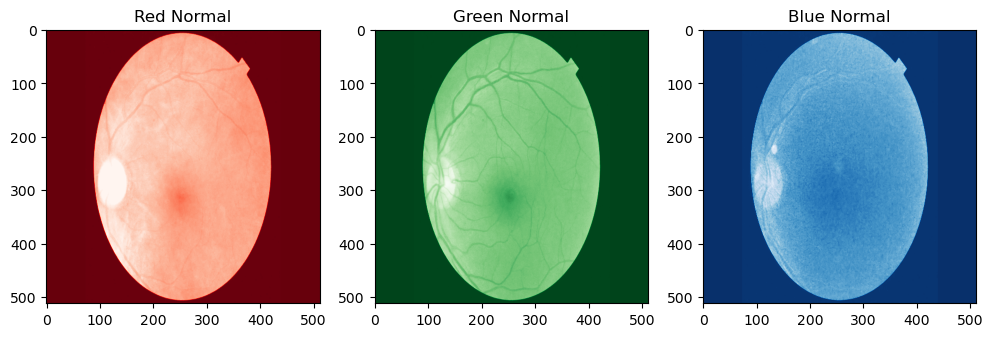

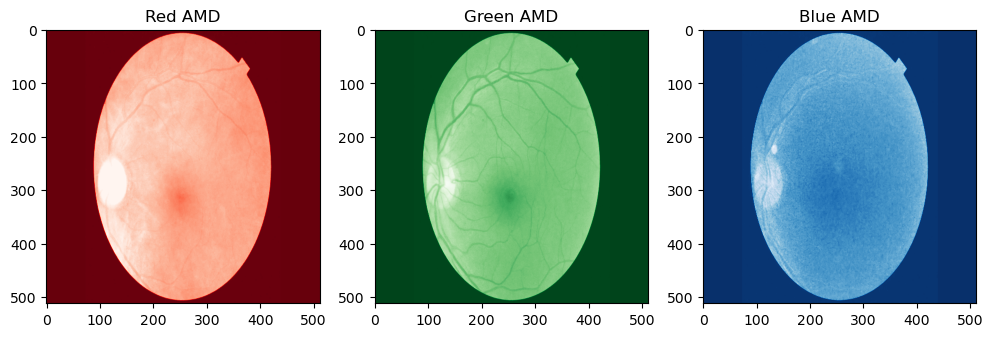

In [7]:
rgb_normal, rgb_amd = rgb_split_normal(normal, amd)
rgb_split_amd(normal, amd)

In [8]:
def clahe(normal, amd):
    # apply CLAHE
    clahe = cv2.createCLAHE(clipLimit=5)
    g_clahe_enhanced_n = clahe.apply(normal[1]) + 50
    g_clahe_enhanced_a = clahe.apply(amd[1]) + 50

    # merge enhanced channels
    clahe_enhanced_img_n = cv2.merge((normal[0], g_clahe_enhanced_n, normal[2]))
    clahe_enhanced_img_a = cv2.merge((amd[0], g_clahe_enhanced_a, amd[2]))

    images = [clahe_enhanced_img_n, clahe_enhanced_img_a]
    
    num_rows, num_cols = 1, 2
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
    axes = axes.flatten()

    for i, (image, ax) in enumerate(zip(images, axes)):
        ax.imshow(image)
        ax.set_title('{}'.format('Normal' if i == 0 else 'AMD'))
    plt.show()

    return clahe_enhanced_img_n, clahe_enhanced_img_a

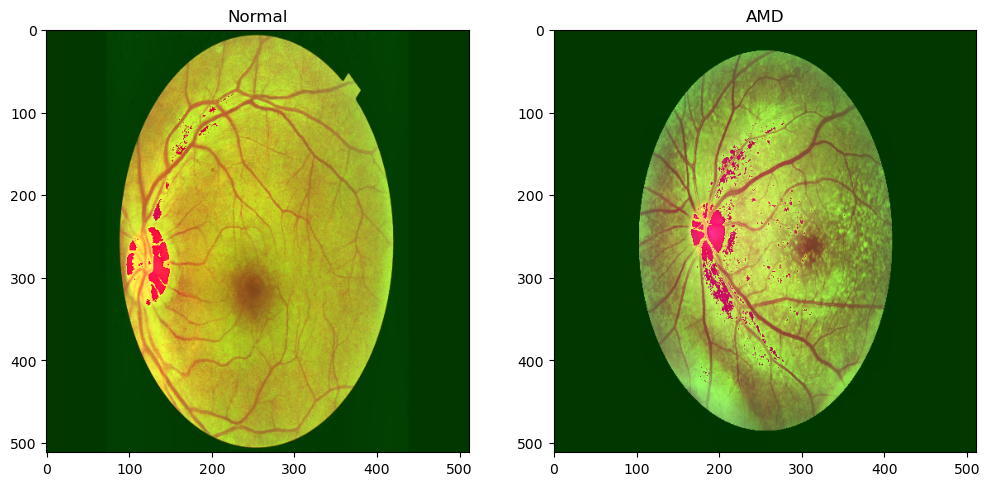

In [9]:
clahe_n, clahe_a = clahe(rgb_normal, rgb_amd)

In [10]:
def grayscale(normal, amd):
    grayscale_n = cv2.cvtColor(normal, cv2.COLOR_BGR2GRAY)
    grayscale_a = cv2.cvtColor(amd, cv2.COLOR_BGR2GRAY)

    images = [grayscale_n, grayscale_a]
    
    num_rows, num_cols = 1, 2
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
    axes = axes.flatten()

    for i, (image, ax) in enumerate(zip(images, axes)):
        ax.imshow(image, cmap='gray')
        ax.set_title('{}'.format('Normal' if i == 0 else 'AMD'))
    plt.show()

    return grayscale_n, grayscale_a

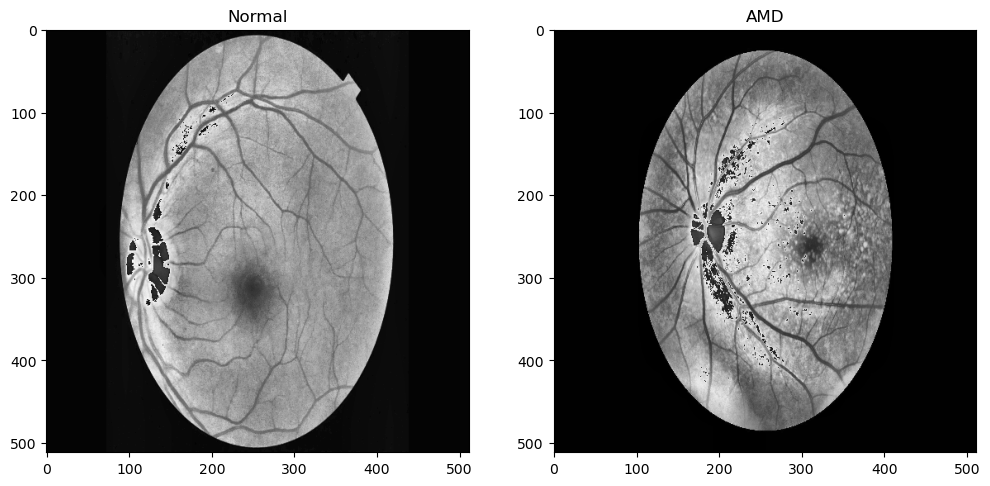

In [11]:
final_normal, final_amd = grayscale(clahe_n, clahe_a)

## Segmentation

In [12]:
import pickle

folder = '../data/augmented-data/U-Net/ODIR'

pickle_in = open(folder + '/' + 'ODIR_Pure_AMD_pred.pickle','rb')
ODIR_Pure_AMD = pickle.load(pickle_in)

folder = '../data/augmented-data/U-Net/RFMID'

pickle_in = open(folder + '/' + 'RFMID_normal_pred.pickle','rb')
RFMID_normal = pickle.load(pickle_in)

In [13]:
def segmentation(normal, amd):
    images = [normal, amd]
    
    num_rows, num_cols = 1, 2
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
    axes = axes.flatten()

    for i, (image, ax) in enumerate(zip(images, axes)):
        ax.imshow(image, cmap='gray')
        ax.set_title('{}'.format('Normal' if i == 0 else 'AMD'))
    plt.show()

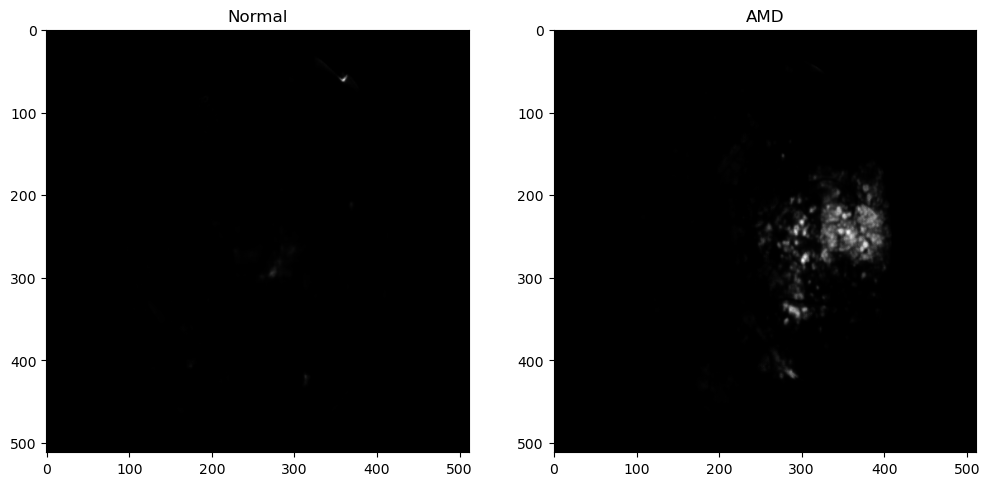

In [34]:
segmentation(RFMID_normal[12], ODIR_Pure_AMD[16])